In [ ]:
!pip install netcdf4
!pip install cartopy
!pip install rioxarray geopandas

In [ ]:
import geopandas as gpd
import xarray as xr
import cartopy as crt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
from scipy.stats import pearsonr

In [ ]:
# Download Data Temperatur Udara
!wget https://downloads.psl.noaa.gov/Datasets/udel.airt.precip/air.mon.mean.v501.nc

--2023-12-01 02:29:53--  https://downloads.psl.noaa.gov/Datasets/udel.airt.precip/air.mon.mean.v501.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250997108 (239M) [application/x-netcdf]
Saving to: ‘air.mon.mean.v501.nc’

air.mon.mean.v501.n 100%[===================>] 239.37M  26.2MB/s    in 5.1s    

2023-12-01 02:29:59 (47.1 MB/s) - ‘air.mon.mean.v501.nc’ saved [250997108/250997108]



In [ ]:
# Download Data Presipitasi
!wget https://downloads.psl.noaa.gov/Datasets/udel.airt.precip/precip.mon.total.v501.nc

--2023-12-01 01:38:35--  https://downloads.psl.noaa.gov/Datasets/udel.airt.precip/precip.mon.total.v501.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305541670 (291M) [application/x-netcdf]
Saving to: ‘precip.mon.total.v501.nc’

precip.mon.total.v5 100%[===================>] 291.39M  81.3MB/s    in 3.7s    

2023-12-01 01:38:38 (79.6 MB/s) - ‘precip.mon.total.v501.nc’ saved [305541670/305541670]



In [ ]:
Pr=xr.open_dataarray('precip.mon.total.v501.nc')
dataPr = Pr.sel(time=slice('1996-01','1998-12'))
Pr

<xarray.DataArray 'precip' (time: 1416, lat: 360, lon: 720)>
[367027200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2017-12-01
Attributes:
    units:         cm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Monthly total of precipitation
    cell_methods:  time: sum
    avg_period:    0000-01-00 00:00:00
    actual_range:  [  0.   776.75]
    valid_range:   [   0. 1200.]
    dataset:       Univ. of Delaware Precipitation and Air Temp v5.01

In [ ]:
Tm=xr.open_dataarray('air.mon.mean.v501.nc')
dataTm = Tm.sel(time=slice('1996-01','1998-12'))
Tm

<xarray.DataArray 'air' (time: 1416, lat: 360, lon: 720)>
[367027200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2017-12-01
Attributes:
    long_name:      Monthly mean of surface temperature
    units:          degC
    var_desc:       Air Temperature
    level_desc:     Surface
    statistic:      Mean
    parent_stat:    Other
    standard_name:  air_temperature
    cell_methods:   time: mean
    valid_range:    [-90.  50.]
    actual_range:   [-81.5  43.9]
    dataset:        Univ. of Delaware Precipitation and Air Temp v5.01

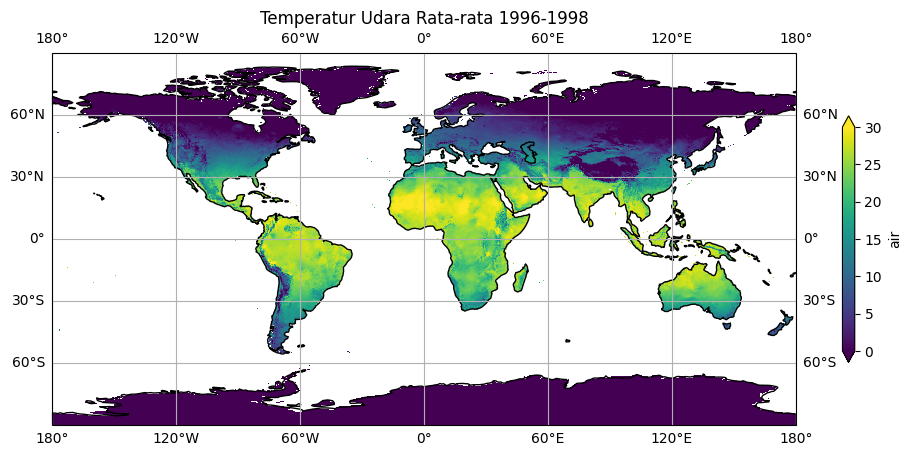

In [ ]:
# Proyeksi Data Temperatur Udara

temperature_data = dataTm.sel(time=slice('1996-01', '1998-12'))
average_temperature = temperature_data.mean(dim='time')

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
average_temperature.sel().plot(ax=ax,transform=ccrs.PlateCarree(),
                                     vmin=0,vmax=30,
                                     cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Temperatur Udara Rata-rata 1996-1998')
plt.savefig('Temperatur Udara Rata-rata 1996-1998.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Presipitasi Rata-rata 1996-1998')

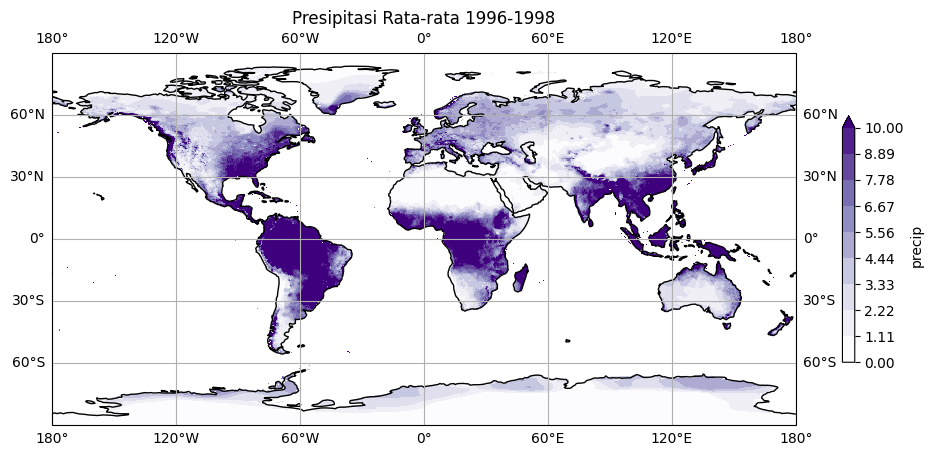

In [ ]:
# Proyeksi Data Presipitasi

precipitation_data = dataPr.sel(time=slice('1996-01', '1998-12'))
average_precipitation = precipitation_data.mean(dim='time')

proj=crt.crs.PlateCarree()
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection=proj)
average_precipitation.sel().plot(ax=ax,
                              transform=proj,
                              cmap='Purples',
                              vmin=0,
                              vmax=10,
                              levels=10,
                              cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Presipitasi Rata-rata 1996-1998')
plt.savefig('Presipitasi Rata-rata 1996-1998.png', dpi=300, bbox_inches='tight')

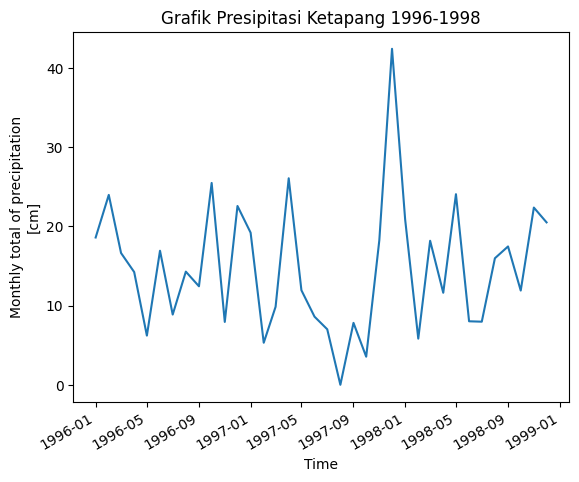

In [ ]:
# Grafik presipitasi Kupang 1996-1998
ts=dataPr.sel(lat=-1.58333, lon=110.5,method='nearest')
ts.plot()
plt.title('Grafik Presipitasi Ketapang 1996-1998')
plt.savefig('Grafik Presipitasi Ketapang 1996-1998.png', dpi=300, bbox_inches='tight')

In [ ]:
# Rerata presipitasi pada suatu daerah (Ketapang)
dataPr.sel(lat=-1.58333, lon=110.5, method='nearest').mean()

<xarray.DataArray 'precip' ()>
array(14.807778, dtype=float32)
Coordinates:
    lat      float32 -1.75
    lon      float32 110.8

In [ ]:
# Standar Deviasi presipitasi pada suatu daerah (Ketapang)
dataPr.sel(lat=-1.58333, lon=110.5, method='nearest').std()

<xarray.DataArray 'precip' ()>
array(8.17578, dtype=float32)
Coordinates:
    lat      float32 -1.75
    lon      float32 110.8

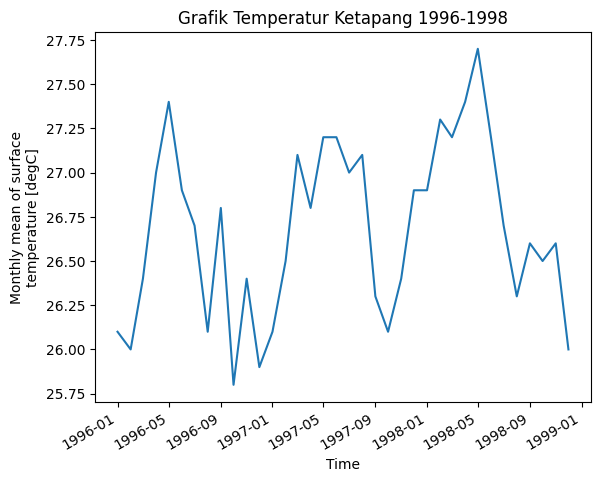

In [ ]:
# Grafik temperatur Kupang 1996-1998
ts=dataTm.sel(lat=-1.58333, lon=110.5,method='nearest')
ts.plot()
plt.title('Grafik Temperatur Ketapang 1996-1998')
plt.savefig('Grafik Temperatur Ketapang 1996-1998', dpi=300, bbox_inches='tight')

In [ ]:
# Rerata temperatur pada suatu daerah (Ketapang)
dataTm.sel(lat=-1.58333, lon=110.5, method='nearest').mean()

NameError: ignored

In [ ]:
# Standar Deviasi temperatur pada suatu daerah (Ketapang)
dataTm.sel(lat=-1.58333, lon=110.5, method='nearest').std()

<xarray.DataArray 'air' ()>
array(0.48676953, dtype=float32)
Coordinates:
    lat      float32 -1.75
    lon      float32 110.8

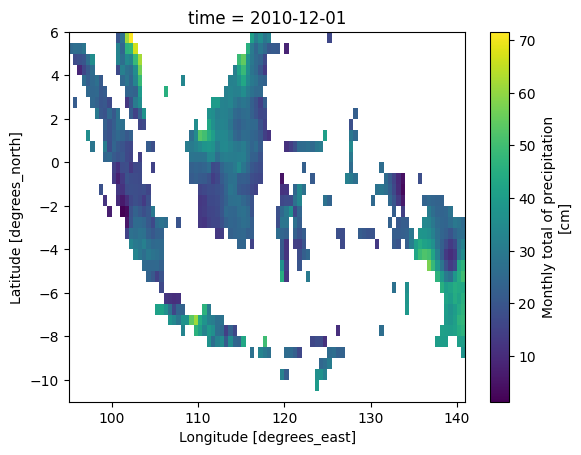

In [ ]:
Indon=Pr.sel(lon=slice(95,141),lat=slice(6,-11))
Indon.sel(time='2010-12-01').plot()

Text(0.5, 1.0, 'Pretisipasi Januari 1998')

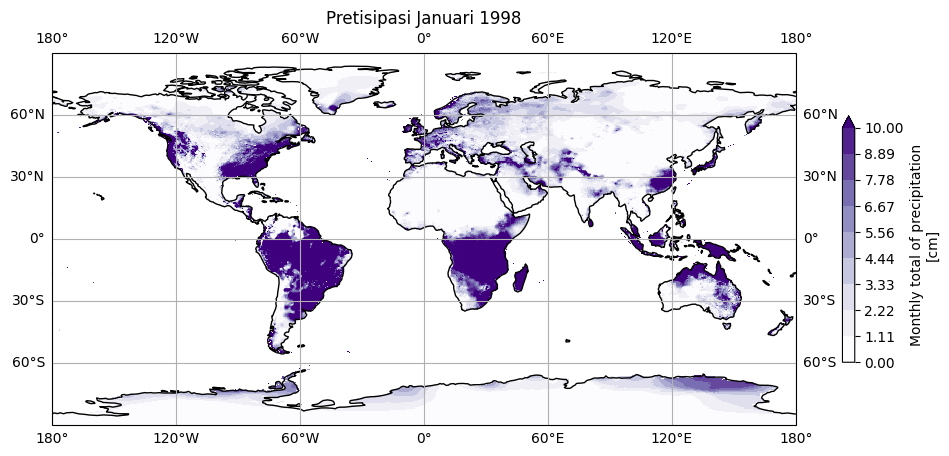

In [ ]:
# Proyeksi Data Pretisipasi
proj=crt.crs.PlateCarree()
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection=proj)
Pr.sel(time='1998-01').plot(ax=ax,
                              transform=proj,
                              cmap='Purples',
                              vmin=0,
                              vmax=10,
                              levels=10,
                              cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Pretisipasi Januari 1998')

Text(0.5, 1.0, 'Temperatur Januari 1998')

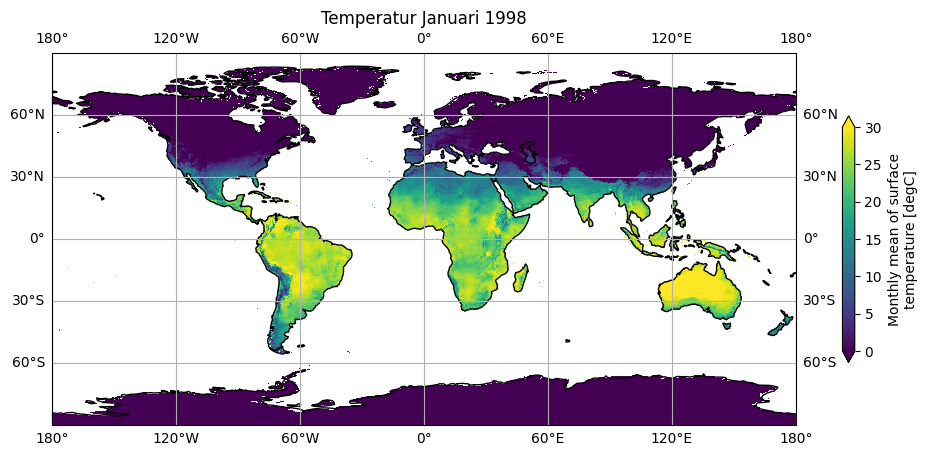

In [ ]:
# Proyeksi Data Temperatur
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
dataTm.sel(time='1998-01').plot(ax=ax,transform=ccrs.PlateCarree(),
                                     vmin=0,vmax=30,
                                     cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Temperatur Januari 1998')

Text(0.5, 1.0, 'Grafik Rerata Presipitasi 1996-1998')

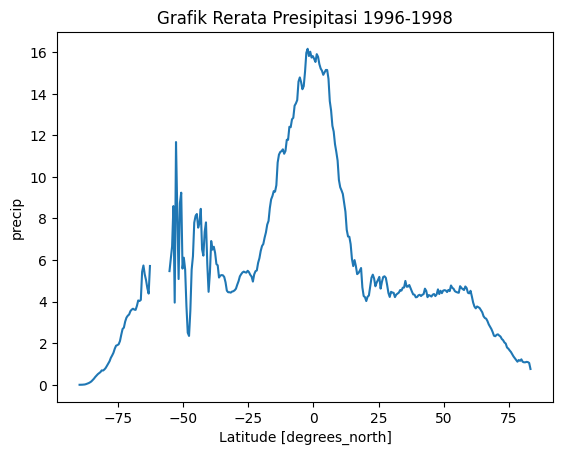

In [ ]:
# Rata-rata pretisipasi pada lintang tertentu (1996-1998)
sst_time_and_zonal_mean = dataPr.sel().mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()
plt.title('Grafik Rerata Presipitasi 1996-1998')

Text(0.5, 1.0, 'Grafik Rerata Temperatur Udara 1996-1998')

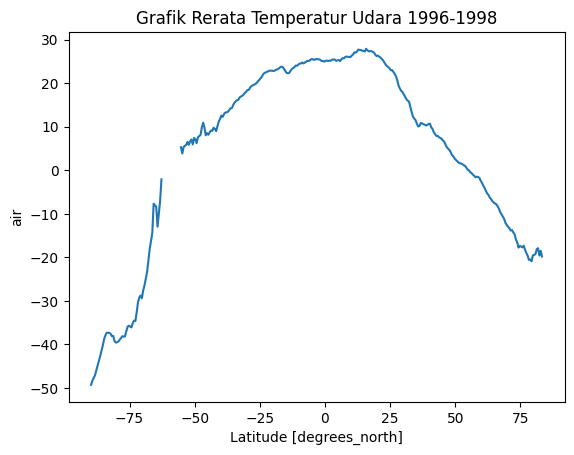

In [ ]:
# Rata-rata temperatur pada lintang tertentu (1996-1998)
sst_time_and_zonal_mean = dataTm.sel().mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()
plt.title('Grafik Rerata Temperatur Udara 1996-1998')

In [ ]:
# Korelasi antara temperatur dan pretisipasi
temperature_data = dataTm
precipitation_data = dataPr

correlation = xr.corr(temperature_data, precipitation_data, dim='time')

print(f'Korelasi antara temperatur dan presipitasi: {correlation.values}')

Korelasi antara temperatur dan presipitasi: [[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [-0.10691867 -0.10691867 -0.10671996 ... -0.11407874 -0.11405986
  -0.1139723 ]
 [-0.10331595 -0.10331595 -0.10331595 ... -0.09352794 -0.10340358
  -0.10340358]
 [-0.05841129 -0.05836821 -0.05836821 ... -0.05863708 -0.05863708
  -0.05863708]]


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [ ]:
ds = xr.open_dataset('precip.mon.total.v501.nc')

# Access the precipitation variable and select a specific range
precipitation_data = ds['precip'].sel(time=slice('1980-01', '2000-12'))

# Calculate the average over the selected range
average_precipitation = precipitation_data.mean(dim='time')

# Normalize the data to the 0-50 scale
norm = mcolors.Normalize(vmin=0, vmax=10)

# Create a colormap
cmap = plt.cm.get_cmap('Purples')

# Plot the data
fig, ax = plt.subplots()
sc = ax.imshow(average_precipitation, cmap=cmap, norm=norm)

# Customize the plot as needed
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Average Precipitation within a Specific Range')

# Show colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.75)
cbar.set_label('Presipitasi')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Pretisipasi Mei 1997')

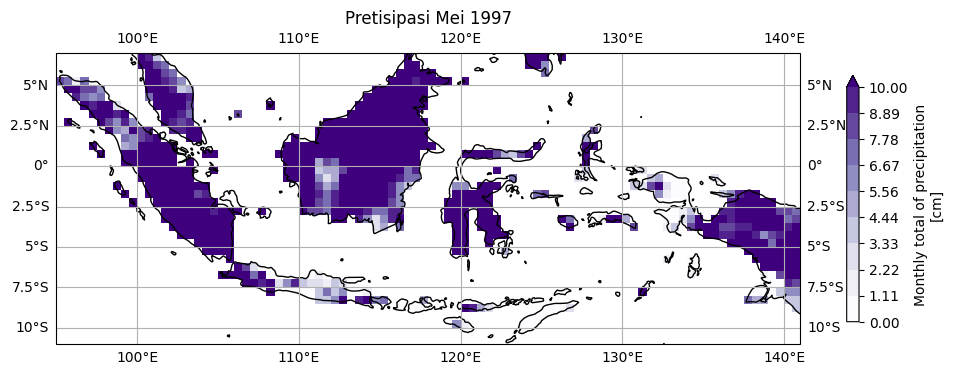

In [ ]:
indon=dataPr.sel(lon=slice(95,141),lat=slice(7,-11))
proj=crt.crs.PlateCarree()
fig=plt.figure(figsize=(12,8))
ax=plt.axes(projection=proj)
indon.sel(time='1997-05').plot(ax=ax,
                              transform=proj,
                              cmap='Purples',
                              vmin=0,
                              vmax=10,
                              levels=10,
                              cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Pretisipasi Mei 1997')

Text(0.5, 1.0, 'Temperatur Mei 1997')

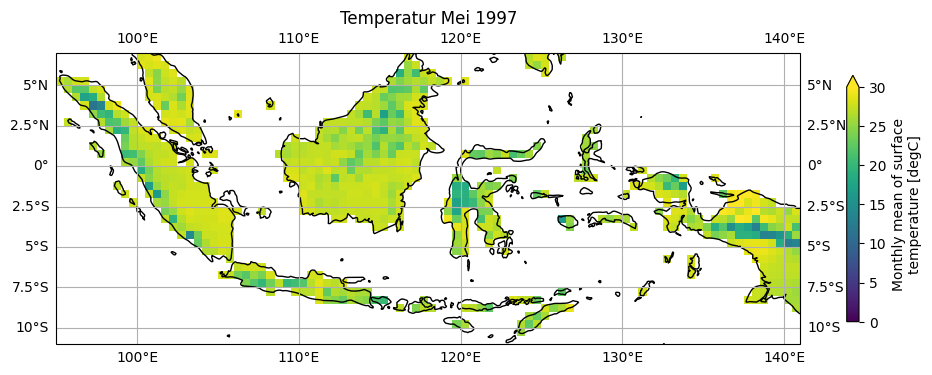

In [ ]:
indon=dataTm.sel(lon=slice(95,141),lat=slice(7,-11))
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
indon.sel(time='1997-05').plot(ax=ax,transform=ccrs.PlateCarree(),
                                     vmin=0,vmax=30,
                                     cbar_kwargs={'shrink': 0.4})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Temperatur Mei 1997')